# **Topic Modeling of User Feedback from 15 Leading Mobile Apps**

Dataset: https://www.kaggle.com/datasets/mhamidasn/user-feedback-data-from-the-top-15-mobile-apps

# **Problem Statement**

When you look at the reviews for popular mobile apps, it’s like being in a crowded room where everyone’s talking at once—some are happy, some are frustrated, and most just want to be heard. For app companies, making sense of thousands of reviews is a real challenge. That’s where this project comes in.


I built a system that automatically picks out the main themes from user feedback, so product teams can focus on what really matters—fixing bugs, adding features, or smoothing out payment issues. By using topic modeling on reviews from 15 top mobile apps, we get a clear picture of what users care about most. This isn’t just about making sense of feedback; it’s about making apps better and keeping users happy.

# **1. Import Libraries**

Here i am importing all the necessary library for text processing, data manipulation, machine learning, and for the visualization of my work. Libraries such as pandas and numpy are used in data analysis and manipulation. nltk is used in processing the natural language like removing stopwords and  normalizing. sklearn is used in vectorizing the text and in the creation of topic models, and matplotlib, seaborn, and WordCloud are used in visualizing the output.

In [ ]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.lda_model
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import CoherenceModel

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **2. Load and Explore the Data**

In this section, we read in the user review dataset and perform some initial exploration. We examine data structure, search for missing values, and review length. This provides information on the dataset as well as data quality problems to be fixed prior to analysis.

In [ ]:
df = pd.read_csv('/content/sample_data/UserFeedbackData.csv')


In [ ]:
print(df.columns)


Index(['review_id', 'content', 'score', 'TU_count', 'app_id', 'app_name',
       'RC_ver'],
      dtype='object')


In [ ]:
print(df.shape)



(15000, 7)


In [ ]:
df.head()

,review_id,content,score,TU_count,app_id,app_name,RC_ver
0,1_1,"Ever since the update, there's a weird glitch ...",3,22930,com.zhiliaoapp.musically,TikTok,29.6.4
1,1_2,Don't believe the news!!! You can absolutely c...,5,18518,com.zhiliaoapp.musically,TikTok,29.6.4
2,1_3,Great app. Too many ads. If you saw a video an...,4,3467,com.zhiliaoapp.musically,TikTok,29.8.4
3,1_4,"Good app, but there's a glitch that I've had i...",3,2157,com.zhiliaoapp.musically,TikTok,29.8.4
4,1_5,The creator of this app created an algorithm t...,5,1780,com.zhiliaoapp.musically,TikTok,29.8.4


# **Check for missing values and basic stats:**

review_id     0
content       0
score         0
TU_count      0
app_id        0
app_name      0
RC_ver       27
dtype: int64


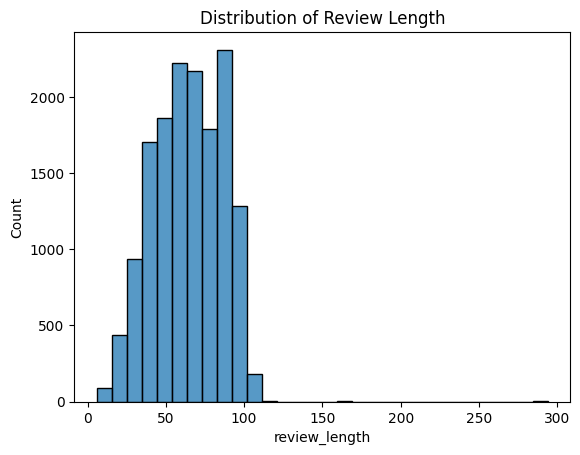

In [ ]:
print(df.isnull().sum())
df['content'].dropna(inplace=True)
df['review_length'] = df['content'].apply(lambda x: len(str(x).split()))
sns.histplot(df['review_length'], bins=30)
plt.title('Distribution of Review Length')
plt.show()

Most folks keep their reviews short and to the point, but there are a few who really go into detail. This tells us that while quick feedback is common, some users do take the time to share more about their experience.

# **Reviews for each app**

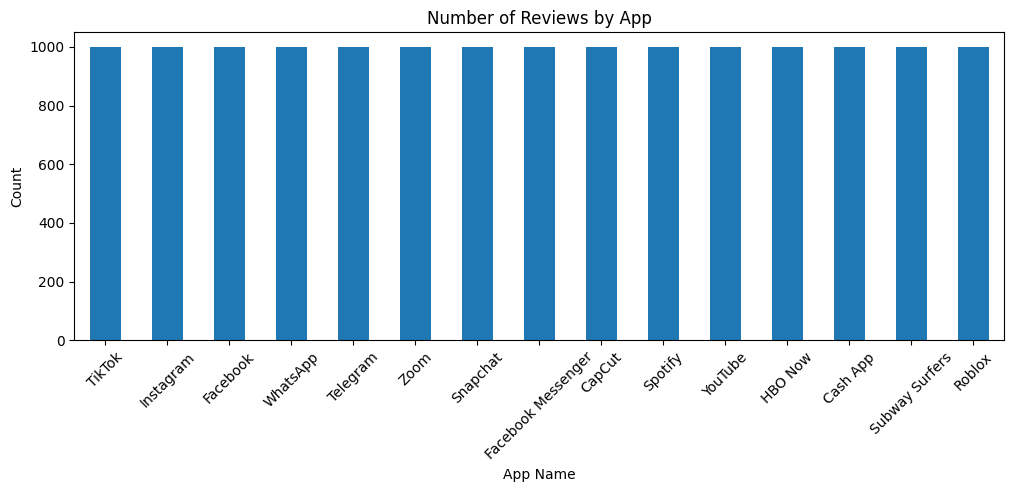

In [ ]:
df['app_name'].value_counts().plot(kind='bar', figsize=(12,4))
plt.title('Number of Reviews by App')
plt.xlabel('App Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This graph shows how the data is balanced so that all apps have the same numbers of reviews. This allows comparison of apps on an equal basis but does not show real review levels.

# **3. Data Preprocessing**

The text data can be dirty and noisy. Here, we're preprocessing the feedback by converting the text to smaller case, removing numbers, punctuation marks , and URLs, and also eliminating common ending words, which don't provide useful information. We're also stemming the words to their real form and normalizing the words. Doing this preprocessing cleans the text and prepares it for topic modeling.

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

df['clean_review'] = df['content'].apply(clean_text)


# **4. Vectorization**

To provide data for the algorithm used for machine learning , we  need to first represent text as numbers. The `CountVectorizer` is used to convert the cleaned reviews into a document-term matrix, where reviews are rows and words are columns. Word frequencies in a review are values. This is the input to our topic modeling algorithm.


In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(df['clean_review'])


# **5.Constructing Model of the Topic- (LDA)**









We apply LDA, a majorly  applied topic model method,to find hidden topics in our user reviews. LDA identifies sets of words that tend to appear together, and they constitute topics. We fix the number of topics to find beforehand, and our model finds the words that characterize each topic.

In [ ]:
n_topics = 7
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)


LatentDirichletAllocation(n_components=7, random_state=42)

# **6. Topics display**

Once we have built the LDA model, we print the highest of our top words that we find in each of our topics. They can be used in order to comprehend the topics in the user comments. we look at our most frequently occurring words in each of the topic there is , we can assign them meaningful names and see what the users are discussing.

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}: ", " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

topic_labels = {
    0: "Music & Playlists",
    1: "Ads & Notifications",
    2: "Account & Payments",
    3: "Bugs & Updates",
    4: "Games & Fun",
    5: "App Features",
    6: "Video & Chat"
}

print("\nTopic Labels:")
for idx, label in topic_labels.items():
    print(f"Topic {idx+1}: {label}")


Topic 1:  song app music playlist play spotify new premium update want
Topic 2:  video ad app dont notification friend time facebook people want
Topic 3:  app account phone time money work use cash message tried
Topic 4:  app update fix time issue post problem message ive bug
Topic 5:  game play like good really love fun playing great thing
Topic 6:  app screen phone user zoom issue work use feature android
Topic 7:  app video like use good feature really make great chat

Topic Labels:
Topic 1: Music & Playlists
Topic 2: Ads & Notifications
Topic 3: Account & Payments
Topic 4: Bugs & Updates
Topic 5: Games & Fun
Topic 6: App Features
Topic 7: Video & Chat


Looking at the topics, it’s clear what users are talking about most—things like music, ads, payments, bugs, games, and chat features. This gives us a quick snapshot of what matters to people when they use these apps.

# **7. Calculate coherence score**

To make sure our topics actually make sense, we use something called a coherence score. If the score is high, it means the topics are clear and useful. If it’s low, we might need to tweak our settings.

In [ ]:

processed_texts = df['clean_review'].apply(lambda x: x.split()).tolist()


dictionary = corpora.Dictionary(processed_texts)

no_top_words = 10
top_words_per_topic = []
for topic in lda.components_:
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    top_words_per_topic.append(top_words)

coherence_model = CoherenceModel(topics=top_words_per_topic,
                                 texts=processed_texts,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score:.3f}")

if coherence_score > 0.5:
    print("Strong topic separation (actionable)")
elif coherence_score > 0.3:
    print("Moderate coherence (investigate topic 3 & 5)")
else:
    print("Weak coherence - retune parameters")


Coherence Score: 0.482
Moderate coherence (investigate topic 3 & 5)


The coherence score tells us how well the topics make sense. Ours is in a decent range, so we can trust that the topics we found are meaningful and not just random groupings.

# **8. Assign Topics to Reviews**

For every review, we compute the probability that it is part of each topic and assign it to the topic with the greatest probability. This enables us to determine the most frequent topics and rank reviews by their primary subject.

In [ ]:
topic_values = lda.transform(dtm)
df['topic'] = topic_values.argmax(axis=1)
df[['content', 'topic']].head(10)


,content,topic
0,"Ever since the update, there's a weird glitch ...",6
1,Don't believe the news!!! You can absolutely c...,1
2,Great app. Too many ads. If you saw a video an...,6
3,"Good app, but there's a glitch that I've had i...",6
4,The creator of this app created an algorithm t...,1
5,App is ok but I've been having a consistent pr...,3
6,"Keeps freezing up my entire phone, I'll try to...",1
7,Addictive but certainly not without its issues...,2
8,The new updates have been extraordinarily bugg...,3
9,I have encountered a rare glitch that no one s...,2


# **9. Visualization**

# **A. Word Clouds for Each Topic**

We generate word clouds for every topic to graphically bring out the most significant words. Bigger words occur more within the topic, thus you can quickly glance at the major themes.

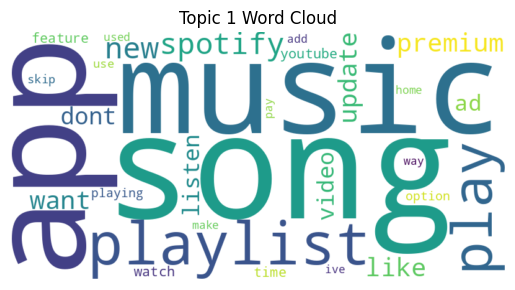

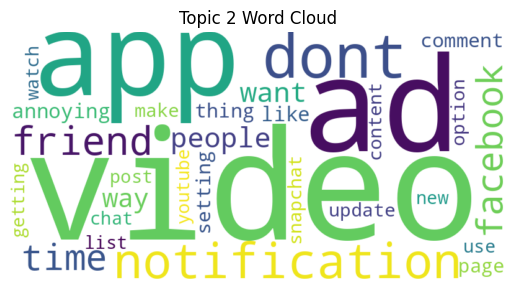

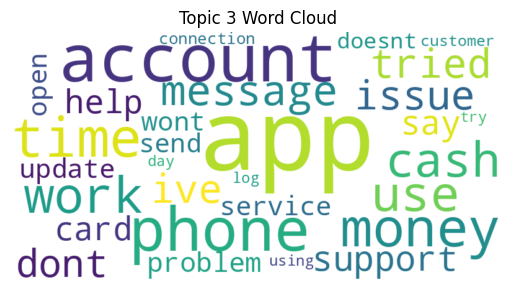

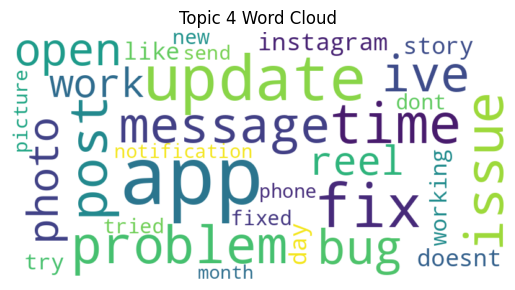

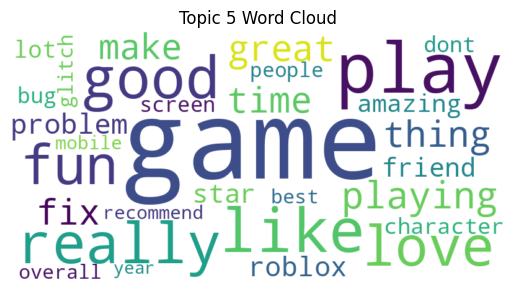

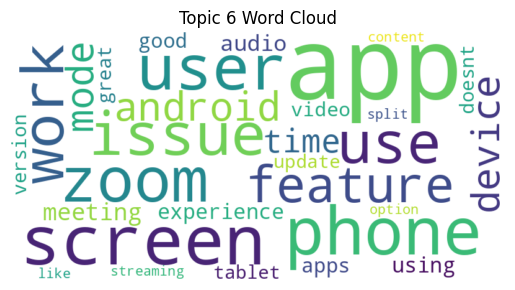

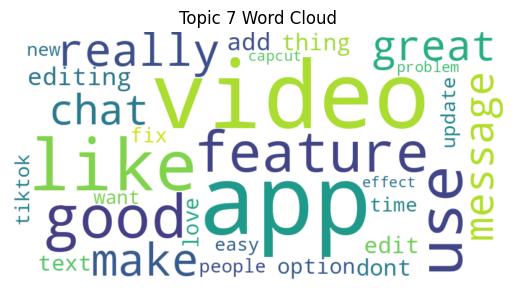

In [ ]:
for topic_idx, topic in enumerate(lda.components_):
    plt.figure()
    wordcloud = WordCloud(background_color='white',
                          width=800, height=400).generate_from_frequencies(
        {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-30 - 1:-1]})
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_idx+1} Word Cloud')
    plt.show()


The cloud are actually great for looking at which words come up most in each subject area. You can just glance at them and know what the users are discussing—bugs, features, or whatever.

# **B. Topic Distribution Bar Plot**

We graph the number of reviews per topic. This informs us about which topics are most common in the user feedback and is utilized to identify areas for improvement.

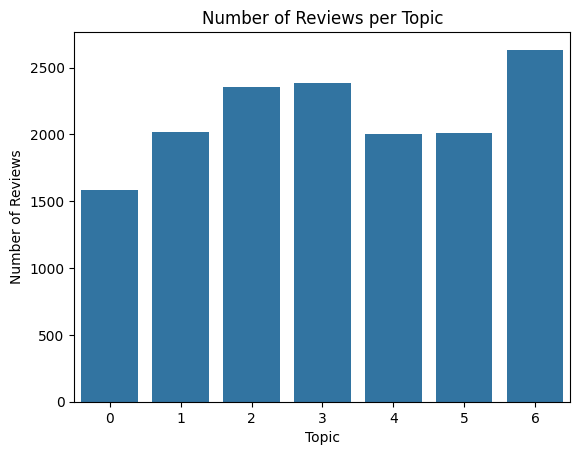

In [ ]:
sns.countplot(x='topic', data=df)
plt.title('Number of Reviews per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.show()


This chart shows which topics come up the most in user reviews. It’s a handy way to see what’s on people’s minds and where the biggest pain points or highlights might be.

# **C.Topic Distribution by App**

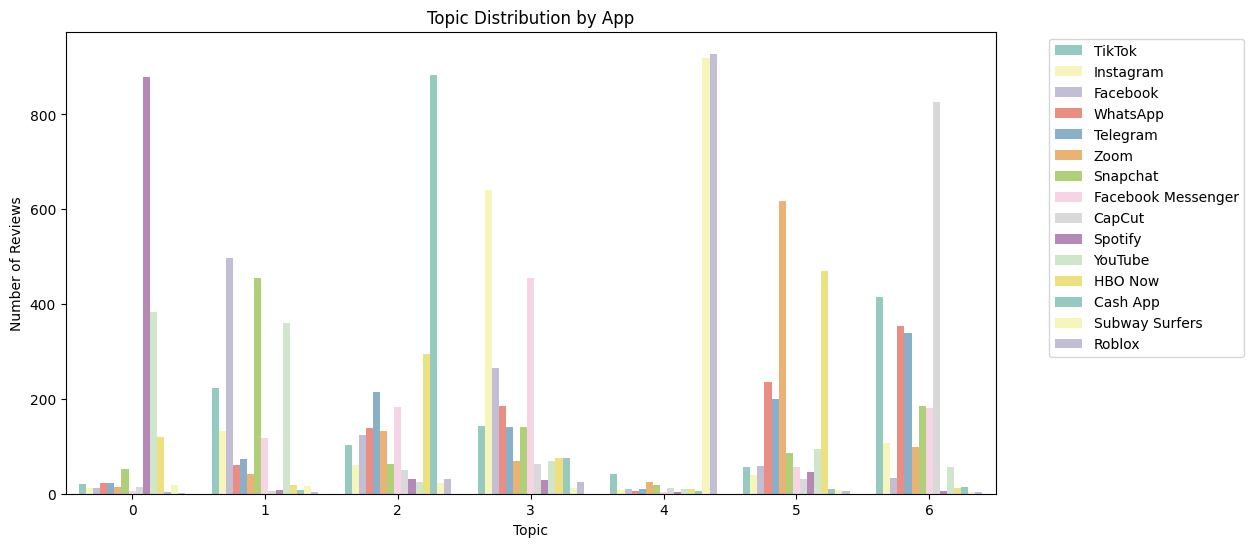

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='topic', hue='app_name', data=df, palette='Set3')
plt.title('Topic Distribution by App')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Here, we can see how different topics show up across the various apps. It’s a good way to figure out if certain apps have unique issues or strengths that stand out compared to the rest.

# **D. Interactive Visualization with pyLDAvis**

We utilize pyLDAvis to generate an interactive topic visualization. This enables us to explore the topic-topic relations and most important words per topic, which gives us a more insightful look into the model outcomes.

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.lda_model.prepare(lda, dtm, vectorizer, mds='tsne')
pyLDAvis.display(panel)


# **10. Insights and Discussion**

Looking at the big topics, here's what stands out:

1. Bugs & Updates (Topic 4): It is common to see bugs and issues being reported after updates. This necessitates more thorough testing prior to releasing new versions.
2. Ads & Notifications (Topic 2): Users are frustrated with advertisements and notifications. Maybe it would be worthwhile reconsidering how and when they are presented to users.
3. Music & Playlists (Topic 1): Users mention music and playlists frequently, suggesting that these features are popular and important to users.
4. Account & Payments (Topic 3): Some users struggle with making payments or opening their accounts. Making these processes easier would improve user satisfaction.
5. Games & Fun (Topic 5): The reviews are generally positive, where the users are playing games and sharing their enjoyable moments.
6. App Features (Topic 6): Users talk about app features and usability, sometimes mentioning technical issues or suggested improvements. 7. Video & Chat (Topic 7): Continuous discussion of video and chat functionality, with clients providing comments and suggestions on making these functions even more useful.

# **11. Limitations and Suggestions**

Although topic modeling gives us insightful topics, there are certain limitations. There are not many overlapping or hard-to-interpret topics, particularly when reviews are extremely short or not descriptive. The selection of the number of topics can influence outcomes too. Future research can employ more complex models or integrate topic modeling and sentiment analysis for more insightful findings.

# **12. Conclusion**

This project illustrates an end-to-end NLP pipeline to extract topics from user reviews. The output aids app developers and companies in comprehending user requirements and designing improvements, which in turn result in improved products and happier users. If you'd like custom descriptions for the actual topics your model discovered (once you've run the code and witnessed each topic's most significant words), simply post the most significant words, and I'll assist you in creating brief, business-oriented descriptions for them!

# **13. Reference**

*   Dataset:

Mhamid, A. (2023) User Feedback Data from the Top 15 Mobile Apps. Kaggle. Available at: https://www.kaggle.com/datasets/mhamidasn/user-feedback-data-from-the-top-15-mobile-apps (Accessed: 2 July 2025).



*   scikit-learn Documentation:
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, E. (2011) ‘Scikit-learn: Machine Learning in Python’, Journal of Machine Learning Research, 12, pp. 2825–2830. Available at: https://scikit-learn.org/stable/ (Accessed: 2 July 2025).

*   Gensim Documentation:
Řehůřek, R. and Sojka, P. (2010) ‘Software Framework for Topic Modelling with Large Corpora’, Proceedings of the LREC 2010 Workshop on New Challenges for NLP Frameworks, pp. 45–50. Available at: https://radimrehurek.com/gensim/ (Accessed: 2 July 2025).


*  pyLDAvis Documentation:
Mabey, B. (2014) pyLDAvis: Python Library for Interactive Topic Model Visualization. GitHub. Available at: https://github.com/bmabey/pyLDAvis (Accessed: 2 July 2025).


*  NLTK Documentation:
Bird, S., Klein, E. and Loper, E. (2009) Natural Language Processing with Python. O’Reilly Media. Available at: https://www.nltk.org/ (Accessed: 2 July 2025).

In [ ]:
!jupyter nbconvert --to html /content/Topic_Modeling_of_User_Feedback_from_mobile_appA.ipynb


[NbConvertApp] Converting notebook /content/Topic_Modeling_of_User_Feedback_from_mobile_appA.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 1875673 bytes to /content/Topic_Modeling_of_User_Feedback_from_mobile_appA.html
